<a href="https://colab.research.google.com/github/kazishuvo22/fastMRI-Reconstruction/blob/master/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.models import Model, load_model
from keras.layers import Input
from keras import optimizers
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import tensorflow as tf
import os, glob

In [ ]:
model_name = "/content/drive/My Drive/CSE499N/unet_v1.h5"
model_name

'/content/drive/My Drive/CSE499N/unet_v1.h5'

In [ ]:
def batch_ssim(y_true, y_pred):
    return tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
batch_mse = tf.keras.metrics.RootMeanSquaredError(name='MSE', dtype=None)

In [ ]:
TEST_DIR_PATH  = "/content/drive/My Drive/CSE499N/Single Coil testNPY"

In [ ]:
TEST_IMAGES_DIR_PATH  = glob.glob(os.path.join(TEST_DIR_PATH,"*.npy"))
TEST_IMAGES_DIR_PATH[:4] 

['/content/drive/My Drive/CSE499N/Single Coil testNPY/file1002452_v2.npy',
 '/content/drive/My Drive/CSE499N/Single Coil testNPY/file1002508_v2.npy',
 '/content/drive/My Drive/CSE499N/Single Coil testNPY/file1002480_v2.npy',
 '/content/drive/My Drive/CSE499N/Single Coil testNPY/file1002472_v2.npy']

In [ ]:
len(TEST_IMAGES_DIR_PATH)

8

##Load the model

In [ ]:
model = load_model(model_name, custom_objects={'batch_ssim':batch_ssim, 'MSE':batch_mse})

In [ ]:
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 320, 320, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 320, 320, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 320, 320, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 320, 320, 16) 2320        dropout[0][0]                    
_______________________________________________________________________________________

In [ ]:
def predict(img_3d):
    
    recon = []
    # Make it 4D for inference
    #img_3d = np.moveaxis(img_3d, 0, 2) # whc
    
    slices = img_3d.shape[0]

    # iterate over each slice and save
    for i in range(slices):
        img = img_3d[i,:,:]
        #img = s.normalize(img) # Normalize image
        img =  img[np.newaxis,:,:,np.newaxis]
        img = model.predict(img)
        img = np.squeeze(img, axis=0)
        img = np.reshape(img, (320, 320))
        recon.append(img)
    
    recon = np.array(recon)
    return recon
 

def show_slices(data, slice_nums, cmap=None):
    fig = plt.figure(figsize=(16, 16))
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)

In [ ]:
#test_images = [os.path.join(TEST_IMAGES_DIR_PATH, x) for x in os.listdir(TEST_IMAGES_DIR_PATH)]
test_images = glob.glob(os.path.join(TEST_DIR_PATH +'/*.npy'))
len(test_images)

8

In [ ]:
a = np.load(test_images[7])
a.shape

(33, 320, 320)

In [ ]:
out_3d = predict(a)
out_3d.shape

(33, 320, 320)

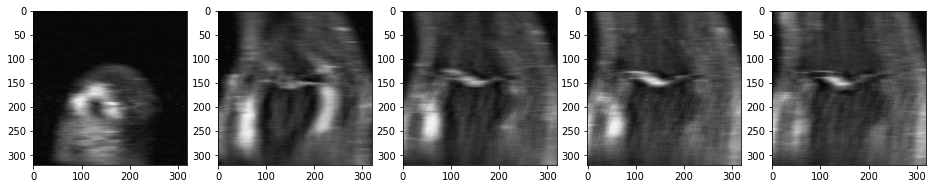

In [ ]:
slice_num = [5, 16, 18, 19, 20]
n = 5
show_slices(a, slice_num, cmap='gray')

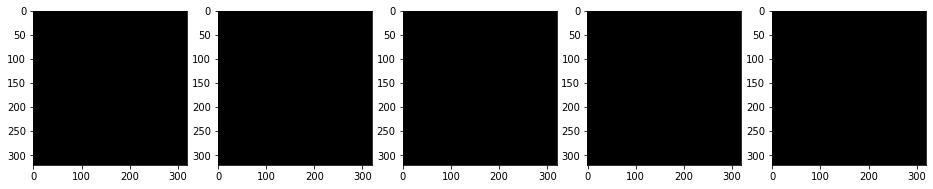

In [ ]:
show_slices(out_3d, slice_num, cmap='gray')